# Matrix with $m$ Rows and $n$ Columns
A matrix $A$ with $m$ rows and $n$ columns is denoted as $A_{m \times n}$, where:

$$
A =
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}
$$

---

# Rank of a Matrix
- **Definition**: The rank of a matrix is the number of linearly independent rows or columns in the matrix.
- **Notation**: $\text{rank}(A)$
- **Properties**:
  - $\text{rank}(A) \leq \min(m, n)$
  - Row rank = Column rank (Rank-Nullity Theorem)

---

# Rank-1 Matrices
A rank-1 matrix can be expressed as the outer product of two vectors:

$$
A = uv^T
$$

Where:
- $u$ is an $m \times 1$ column vector,
- $v$ is an $n \times 1$ column vector.

#### Example:
For $A = \begin{bmatrix} 1 & 2 \\ 2 & 4 \end{bmatrix}$, it can be expressed as:

$$
A = \begin{bmatrix} 1 \\ 2 \end{bmatrix} \begin{bmatrix} 1 & 2 \end{bmatrix}
$$

This is a rank-1 matrix since the rows and columns of $A$ are linearly dependent, confirming that $\text{rank}(A) = 1$.

---

# Singular Value Decomposition (SVD)
The full SVD decomposes a matrix $A$ of size $m \times n$ into three matrices:

$$
A = U \Sigma V^T
$$

Where:
- $U$ is an $m \times m$ orthogonal matrix (left singular vectors),
- $\Sigma$ is an $m \times n$ diagonal matrix with singular values $\sigma_1, \sigma_2, \dots, \sigma_r$ on the diagonal (where $r$ is the rank of $A$),
- $V^T$ is an $n \times n$ orthogonal matrix (right singular vectors).

---

# Rank-1 Matrix Representation in Full SVD
The full SVD expresses $A$ as the sum of rank-1 matrices:

$$
A = \sum_{i=1}^{\min(m, n)} \sigma_i u_i v_i^T
$$

Where:
- $\sigma_i$ are the singular values,
- $u_i$ are the left singular vectors (columns of $U$),
- $v_i$ are the right singular vectors (rows of $V$).

---

# Truncated SVD
The truncated SVD approximates the matrix by considering only the largest $k$ singular values:

$$
A_k = \sum_{i=1}^{k} \sigma_i u_i v_i^T
$$

This represents an approximation of $A$ using the first $k$ rank-1 matrices, where $k$ is chosen based on how much of the matrix's information needs to be preserved.

---

# Why SVD Can Be Thought of as a Linear Combination of Rank-1 Matrices
The full SVD decomposes $A$ into a sum of rank-1 matrices weighted by the singular values $\sigma_i$. These rank-1 matrices represent the directions in the row and column space of $A$, scaled by the singular values. The rank of $A$ is the number of non-zero singular values, and these non-zero terms correspond to the linearly independent components of $A$.

---

# Example with a $3 \times 2$ Matrix
Let the matrix $A$ be a $3 \times 2$ matrix:

$$
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
$$

We can compute the SVD of $A$ using Python's numpy library:

```python
import numpy as np

A = np.array([1, 2, 3, 4, 5, 6]).reshape(3, 2)

U, S, V_transposed = np.linalg.svd(A)

# Reconstruct the matrix as the sum of rank-1 matrices
rank_1_matrix_sigma_1 = S[0] * U[:, 0].reshape(3, 1) @ V_transposed[:, 0].reshape(1, 2)
rank_1_matrix_sigma_2 = S[1] * U[:, 1].reshape(3, 1) @ V_transposed[:, 1].reshape(1, 2)

# Sum the rank-1 matrices to get the original matrix
rank_1_matrix_sigma_1 + rank_1_matrix_sigma_2

```

# Singular Values $\sigma$
The singular values for the matrix $A$ are:

$$
\sigma = [9.52551809, 0.51430058]
$$

---

# Left Singular Vectors $U$
The left singular vectors (columns of $U$) are:

$$
U = \begin{bmatrix}
-0.2298477 & 0.88346102 & 0.40824829 \\
-0.52474482 & 0.24078249 & -0.81649658 \\
-0.81964194 & -0.40189603 & 0.40824829
\end{bmatrix}
$$

---

# Right Singular Vectors $V^T$
The right singular vectors (rows of $V^T$) are:

$$
V^T = \begin{bmatrix}
-0.61962948 & -0.78489445 \\
-0.78489445 & 0.61962948
\end{bmatrix}
$$

---

# Rank-1 Matrices

## For $\sigma_1$:
$$
\text{rank\_1\_matrix\_sigma\_1} = 9.52551809 \cdot \begin{bmatrix} -0.2298477 \\ -0.52474482 \\ -0.81964194 \end{bmatrix} \cdot \begin{bmatrix} -0.61962948 & -0.78489445 \end{bmatrix}
$$

This results in:

$$
\text{rank\_1\_matrix\_sigma\_1} = \sigma_1 u_1 v_1^T = \begin{bmatrix}
1.35662819 & 1.71846235 \\
3.09719707 & 3.92326845 \\
4.83776596 & 6.12807454
\end{bmatrix}
$$

---

## For $\sigma_2$:
$$
\text{rank\_1\_matrix\_sigma\_2} = 0.51430058 \cdot \begin{bmatrix} 0.88346102 \\ 0.24078249 \\ -0.40189603 \end{bmatrix} \cdot \begin{bmatrix} -0.78489445 & 0.61962948 \end{bmatrix} 
$$

This results in:

$$
\text{rank\_1\_matrix\_sigma\_2} = \sigma_2 u_2 v_2^T =  \begin{bmatrix}
-0.35662819 & 0.28153765 \\
-0.09719707 & 0.07673155 \\
0.16223404 & -0.12807454
\end{bmatrix}
$$

---

# Final Matrix Reconstruction
By summing the rank-1 matrices, we recover the original matrix $A$:

$$
A = \text{rank\_1\_matrix\_sigma\_1} + \text{rank\_1\_matrix\_sigma\_2}
$$

Thus, the original matrix is exactly reconstructed as:

$$
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
$$


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

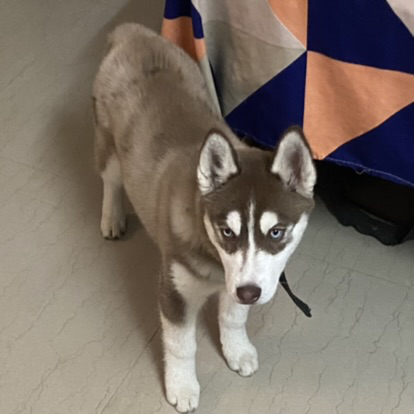

In [2]:
image = Image.open('sky.jpeg')
image

In [3]:
grayscale_image = np.array(image.convert('L'))

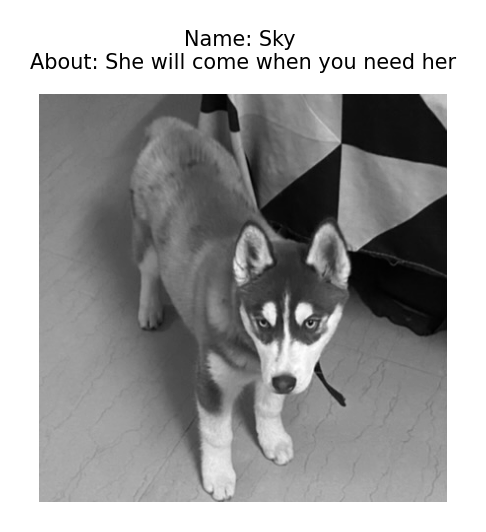

In [4]:
plt.figure(figsize=(3, 2), dpi=300)
plt.imshow(grayscale_image, cmap='gray')
plt.axis(False)
plt.title("Name: Sky \nAbout: She will come when you need her", fontsize=5)
plt.subplots_adjust(bottom=0.2)
plt.show()

In [5]:
U, S, V_transposed = np.linalg.svd(
    grayscale_image, full_matrices=False
)

In [6]:
U.shape, S.shape, V_transposed.shape

((414, 414), (414,), (414, 414))

In [7]:
S[: 3]

array([49028.16879544,  9297.59610923,  7664.22503149])

In [8]:
S[-3: ]

array([0.10836207, 0.03502338, 0.01123529])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reconstruct the image for a given rank
def reconstruct_image(U, S, VT, rank):
    S_k = np.zeros((U.shape[1], VT.shape[0]))  
    np.fill_diagonal(S_k, S[:rank])  
    return np.dot(U[:, :rank], np.dot(S_k[:rank, :rank], VT[:rank, :]))

# Compute the Frobenius norm
def frobenius_norm(original, reconstructed):
    return np.linalg.norm(original - reconstructed, 'fro')

# Get rank-1 matrix
def rank_1_matrix(U, S, VT, i):
    return S[i] * np.outer(U[:, i], VT[i, :])

# Ranks to visualize
ranks = [1, 10, 50, 100, 200, 300, 400, grayscale_image.shape[0]]

# Perform SVD
U, S, VT = np.linalg.svd(grayscale_image, full_matrices=False)

# Plot low-rank approximations
plt.figure(figsize=(15, 15), dpi=300)
plt.subplot(3, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.title('Original Image', fontsize=15)

for i, rank in enumerate(ranks):
    low_rank_image = reconstruct_image(U, S, VT, rank)
    frobenius_error = frobenius_norm(grayscale_image, low_rank_image)
    plt.subplot(3, 3, i + 2)
    plt.imshow(low_rank_image, cmap='gray')
    plt.axis('off')
    if i != len(ranks) - 1: 
        plt.title(f'Rank: {rank}, Frobenius Norm: {frobenius_error:.2f}', fontsize=15)
    else:
        plt.title(f"Full Rank, Frobenius Norm: {frobenius_error:.2f}", fontsize=15)

plt.suptitle('SVD as the weighted sum of Rank One matrices.', fontsize=25)
plt.subplots_adjust(top=0.93)
plt.savefig('frobenius_norm_images.jpg', dpi=300)
plt.show()

# Plot rank-1 matrices
plt.figure(figsize=(15, 15), dpi=300)

for i in range(9):
    rank_1_image = rank_1_matrix(U, S, VT, i)
    plt.subplot(3, 3, i + 1)
    plt.imshow(rank_1_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Rank One Matrix @ Singular Value {i + 1}', fontsize=15)

plt.suptitle('Rank One Matrices @ Singular Values', fontsize=25)
plt.subplots_adjust(top=0.93)
plt.savefig('rank_one_matrices.jpg', dpi=300)
plt.show()

In [11]:
# Example
A = np.array([1, 2, 3, 4, 5, 6]).reshape(3, 2)
print(A)

U, S, V_transposed = np.linalg.svd(A)

rank_1_matrix_sigma_1 = (
    S[0] * U[:, 0].reshape(3, 1) @ 
    V_transposed[:, 0].reshape(1, 2)
)

rank_1_matrix_sigma_2 = (
    S[1] * U[:, 1].reshape(3, 1) @ 
    V_transposed[:, 1].reshape(1, 2)
)

A_SVD = rank_1_matrix_sigma_1 + rank_1_matrix_sigma_2
assert np.allclose(A, A_SVD)

[[1 2]
 [3 4]
 [5 6]]


In [12]:
print(rank_1_matrix_sigma_1)
print('\n')
print(rank_1_matrix_sigma_2)

[[1.35662819 1.71846235]
 [3.09719707 3.92326845]
 [4.83776596 6.12807454]]


[[-0.35662819  0.28153765]
 [-0.09719707  0.07673155]
 [ 0.16223404 -0.12807454]]
